In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('health.csv')
df.head()

,SlNo,RollNumber,StudenNamet,Age,Spo2(%),BPM,harerate(60-100),Spo2(88-98%),condition
0,1,20VV1F0003,Kanakam Akanksha,22,94.8,72,Normal,Normal,healthy
1,2,20VV1F0004,Kotla Bhavani Sankar,27,97.8,99,Normal,Normal,healthy
2,3,20VV1F0005,Kotturu Saikumar,17,97.8,58,low,Normal,"lowHR : Bradycardia, weight gain"
3,4,20VV1F0006,Lavanya Manchipilli,26,98.2,188,high,Normal,"highHR: Tachycardia, heart Attack"
4,5,20VV1F0007,Leelasri Chitrothu,18,97.7,89,Normal,Normal,healthy


In [3]:
df.isnull().sum()

SlNo                0
RollNumber          0
 StudenNamet        0
Age                 0
Spo2(%)             0
BPM                 0
harerate(60-100)    0
Spo2(88-98%)        0
condition           0
dtype: int64

In [4]:
df.shape

(950, 9)

### input formation

In [5]:
df1=pd.read_csv('https://api.thingspeak.com/channels/1787697/fields/1.json?api_key=J16WJXLTTQ0EM9LE&results=2')
df1

,"{""channel"":{""id"":1787697","name:""max30102""","description:""health monitoring""","latitude:""0.0""","longitude:""0.0""","field1:""heart beat""","field2:""spoi2""","created_at:""2022-07-02T10:57:26Z""","updated_at:""2022-07-02T10:57:27Z""",last_entry_id:251},"feeds:[{""created_at"":""2022-09-27T03:06:04Z""",entry_id:250,"field1:""74""}","{""created_at"":""2022-09-27T03:06:23Z""",entry_id:251,"field1:""74""}]}"


In [6]:
s=''
d=s.join(df1) 
d

'{"channel":{"id":1787697name:"max30102"description:"health monitoring"latitude:"0.0"longitude:"0.0"field1:"heart beat"field2:"spoi2"created_at:"2022-07-02T10:57:26Z"updated_at:"2022-07-02T10:57:27Z"last_entry_id:251}feeds:[{"created_at":"2022-09-27T03:06:04Z"entry_id:250field1:"74"}{"created_at":"2022-09-27T03:06:23Z"entry_id:251field1:"74"}]}'

In [7]:
x = d.split("{")
y=x[4] 
y

'"created_at":"2022-09-27T03:06:23Z"entry_id:251field1:"74"}]}'

In [8]:
sp_chars = [';', '"', "*",'[',']','{','}'] 
givenStr = y
givenStr = ''.join(i for i in givenStr if not i in sp_chars) 
givenStr

'created_at:2022-09-27T03:06:23Zentry_id:251field1:74'

In [9]:
m = givenStr.split(':') 
a=m[len(m)-1] 
f=m[len(m)-2]

In [10]:
string = ''.join((element for element in f if element.isdigit()))
string

'2511'

In [11]:
b=string[:-1]

In [12]:
a=int(a) 
b=int(b)
print(a,b)

74 251


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
df['harerate(60-100)']= le.fit_transform(df['harerate(60-100)'])
df['Spo2(88-98%)']= le.fit_transform(df['Spo2(88-98%)'])


In [15]:
df

,SlNo,RollNumber,StudenNamet,Age,Spo2(%),BPM,harerate(60-100),Spo2(88-98%),condition
0,1,20VV1F0003,Kanakam Akanksha,22,94.8,72,0,0,healthy
1,2,20VV1F0004,Kotla Bhavani Sankar,27,97.8,99,0,0,healthy
2,3,20VV1F0005,Kotturu Saikumar,17,97.8,58,2,0,"lowHR : Bradycardia, weight gain"
3,4,20VV1F0006,Lavanya Manchipilli,26,98.2,188,1,0,"highHR: Tachycardia, heart Attack"
4,5,20VV1F0007,Leelasri Chitrothu,18,97.7,89,0,0,healthy
...,...,...,...,...,...,...,...,...,...
945,946,24,Sailaja Devireddy,30,97.8,58,2,0,"lowHR : Bradycardia, weight gain"
946,947,18331A05F8,Tirumalaraju Vijayarama Mohith Varma,19,98.2,88,0,0,healthy
947,948,196D5A0206,Kilani Gnaneswari,20,97.7,89,0,0,healthy
948,949,18X91A0454,Revu .Meghana,26,78.4,73,0,2,"lowSP : Anemia,Asthma,Emphysema,chronic obstru..."


In [16]:
le.classes_

array(['Normal', 'high', 'low'], dtype=object)

In [17]:
X = df[['Spo2(%)','BPM']]
Y = df['condition']

In [18]:
X

,Spo2(%),BPM
0,94.8,72
1,97.8,99
2,97.8,58
3,98.2,188
4,97.7,89
...,...,...
945,97.8,58
946,98.2,88
947,97.7,89
948,78.4,73


In [19]:
Y

0                                                healthy
1                                                healthy
2                       lowHR : Bradycardia, weight gain
3                      highHR: Tachycardia, heart Attack
4                                                healthy
                             ...                        
945                     lowHR : Bradycardia, weight gain
946                                              healthy
947                                              healthy
948    lowSP : Anemia,Asthma,Emphysema,chronic obstru...
949                                              healthy
Name: condition, Length: 950, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=55)

#### KNN classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y2_predict1 = knn.predict(x_test)
y2_predict1

array(['healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'causion : Tachycardia, heart Attack, Oxygen taxicity, cough, \nbreathing trouble.',
       'healthy', 'healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'healthy', 'highSP: Oxygen taxicity, cough, breathing trouble',
       'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'lowHR : Bradycardia, weight gain', 'healthy',
       'healthy', 'highHR: Tachycardia, heart Attack', 'healthy',
       'healthy',
       'causion : Tachycardia, heart Attack, Oxygen taxicity, cough, \nbreathing trouble.',
       'healthy',
       'danger : Bradycardia, weight gain, Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'health

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [26]:
x_test.head(2)

,Spo2(%),BPM
439,94.8,72
294,97.8,99


In [27]:
knn.predict([[a,b]])

C:\Users\stars\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['highHR: Tachycardia, heart Attack'], dtype=object)

#### naivy_bayes
- wp

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [29]:
gnb.fit(x_train,y_train)

GaussianNB()

In [30]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred

array(['healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'causion : Tachycardia, heart Attack, Oxygen taxicity, cough, \nbreathing trouble.',
       'healthy', 'healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'healthy', 'highSP: Oxygen taxicity, cough, breathing trouble',
       'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'lowHR : Bradycardia, weight gain', 'healthy',
       'healthy', 'highHR: Tachycardia, heart Attack', 'healthy',
       'healthy',
       'causion : Tachycardia, heart Attack, Oxygen taxicity, cough, \nbreathing trouble.',
       'healthy',
       'danger : Bradycardia, weight gain, Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'healthy', 'healthy', 'healthy',
       'highSP: Oxygen taxicity, cough, breathing trouble', 'healthy',
       'health

In [31]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 238 points : 13


In [32]:
gnb.predict([[a,b]])

C:\Users\stars\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['healthy'], dtype='<U97')

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

## support vector machine

In [34]:
from sklearn.svm import SVC

In [35]:
sv1 = SVC(kernel='linear')

In [36]:
sv1.fit(X, Y)

SVC(kernel='linear')

In [55]:
y1_predict1 = sv1.predict(X)
y1_predict1

array(['healthy', 'healthy', 'lowHR : Bradycardia, weight gain',
       'highHR: Tachycardia, heart Attack', 'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'healthy', 'highHR: Tachycardia, heart Attack',
       'healthy', 'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'healthy',
       'danger : Bradycardia, weight gain, Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'causion : Tachycardia, heart Attack, Oxygen taxicity, cough, \nbreathing trouble.',
       'healthy', 'healthy', 'lowHR : Bradycardia, weight gain',
       'healthy', 'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'highSP: Oxygen taxicity, cough, breathing trouble',
       'healthy', 'healthy', 'healthy',
       'lowSP : Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese',
       'healthy', 'hea

In [38]:
sv1.predict([[a,b]])

C:\Users\stars\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['highHR: Tachycardia, heart Attack'], dtype=object)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
accuracy_score(Y, y1_predict1)

0.9842105263157894

### Decision Tree
- RP

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [42]:
from sklearn.tree import DecisionTreeClassifier
dcl1 = DecisionTreeClassifier(criterion='gini', 
                              max_depth = 2)

In [43]:
dcl1.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [44]:
confusion_matrix(Y, y_predict1)

array([[ 58,   0,   0,   0,   0,   0,   0,   0],
       [  0,  58,   0,   0,   0,   0,   0,   0],
       [  0,   0, 585,   0,   0,   0,   0,   0],
       [  0,   0,   0,  30,   0,   0,   0,   0],
       [  0,   0,   0,   0,  43,   0,   0,   0],
       [  0,   0,   0,   0,   0,  59,   0,   0],
       [  0,   0,   0,   0,   0,   0, 102,   0],
       [  0,   0,   0,   0,   0,   0,  15,   0]], dtype=int64)

In [45]:
accuracy_score(Y, y_predict1)

0.9842105263157894

In [46]:
dcl1.predict([[a,b]])

C:\Users\stars\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['danger : Bradycardia, weight gain, Anemia,Asthma,Emphysema,chronic obstructiv\ne pulmonary desiese'],
      dtype=object)

#### Explonaory data analysis

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

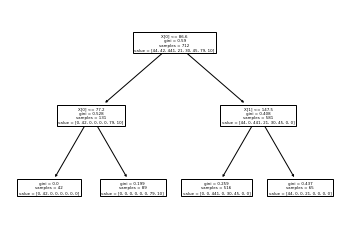

In [48]:
tree.plot_tree(dcl1)
plt.show()

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
X

,Spo2(%),BPM
0,94.8,72
1,97.8,99
2,97.8,58
3,98.2,188
4,97.7,89
...,...,...
945,97.8,58
946,98.2,88
947,97.7,89
948,78.4,73


In [51]:
x2=pd.DataFrame(X)
x2

,Spo2(%),BPM
0,94.8,72
1,97.8,99
2,97.8,58
3,98.2,188
4,97.7,89
...,...,...
945,97.8,58
946,98.2,88
947,97.7,89
948,78.4,73


In [52]:
l1=x2['Spo2(%)'].tolist()
l2=x2['BPM'].tolist()
X1=l1+l2
X1=pd.DataFrame(X1)
X1

,0
0,94.8
1,97.8
2,97.8
3,98.2
4,97.7
...,...
1895,58.0
1896,88.0
1897,89.0
1898,73.0


C:\Users\stars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


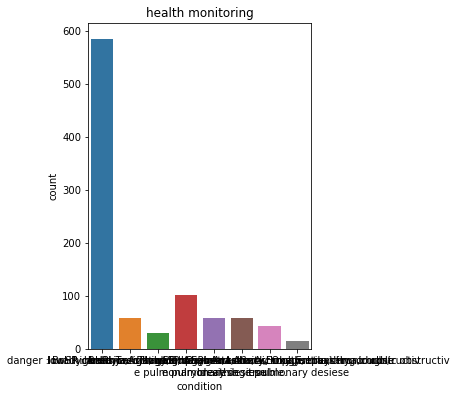

In [53]:
plt.subplots(figsize=(4,6))
sns.countplot(Y, data=X1)
plt.xlabel("condition")
plt.title("health monitoring")
plt.show()